# Image Gradient

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

<Figure size 640x480 with 4 Axes>

# Image Thresholding

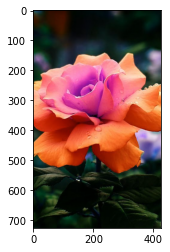

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('flower.jpg')
plt.imshow(img)


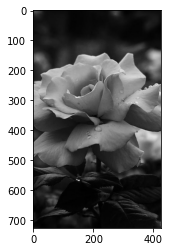

In [3]:
# Adding the 0 flag to read it in black and white
img = cv2.imread('flower.jpg',0)
plt.imshow(img,cmap='gray')

# Different Threshold Types

### Binary 

ret 127.0


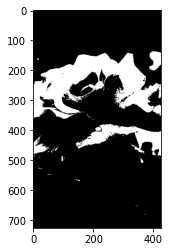

In [4]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print("ret", ret)
plt.imshow(thresh1,cmap='gray')

### Binary Inverse

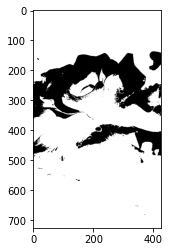

In [5]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

### Threshold Truncation

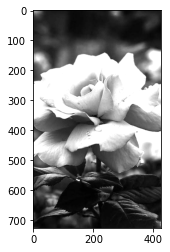

In [6]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

# Threshold to Zero

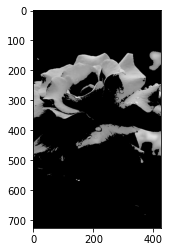

In [7]:
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

# Threshold to Zero (Inverse)

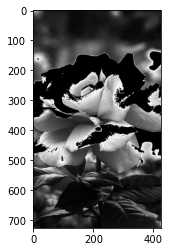

In [8]:
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

# Adaptive Thresholding

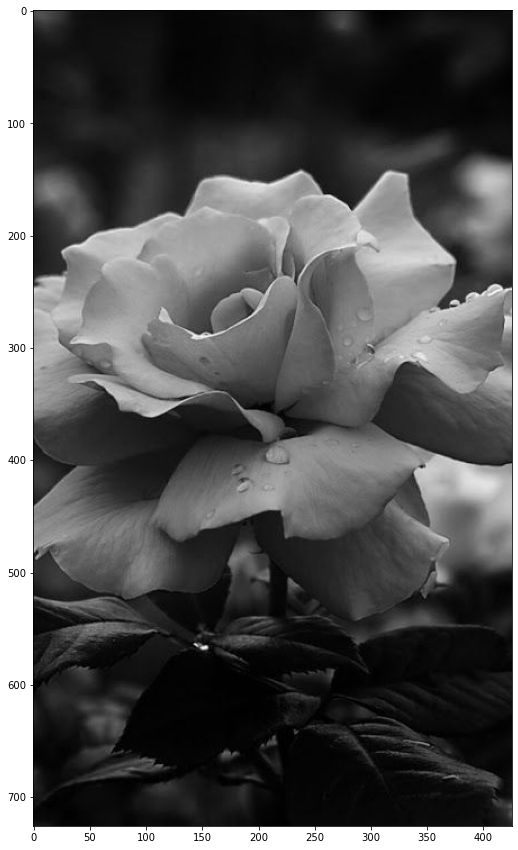

In [9]:
img = cv2.imread("flower.jpg",0)
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
show_pic(img)

### Simple Binary

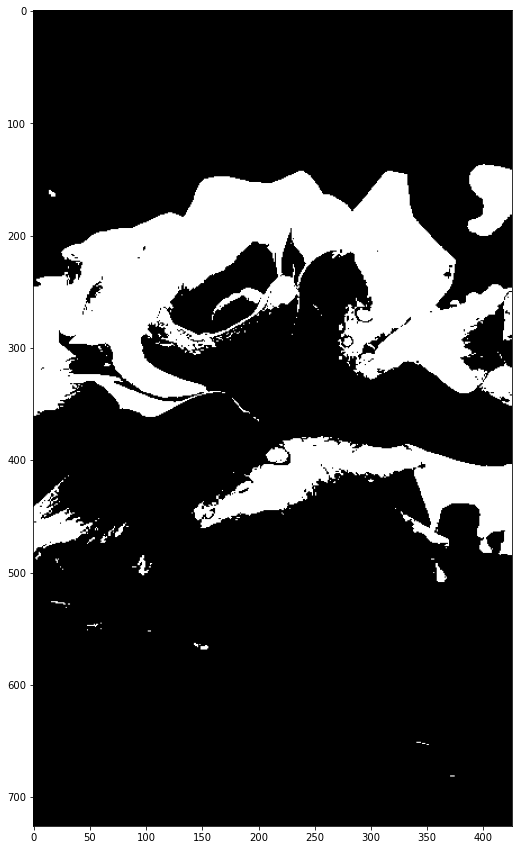

In [10]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
show_pic(th1)

### Adaptive Thresholding

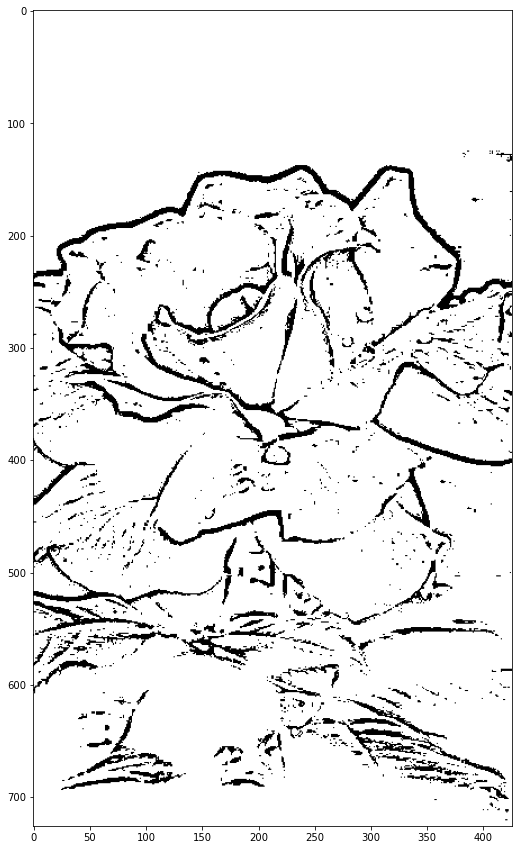

In [11]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
show_pic(th2)

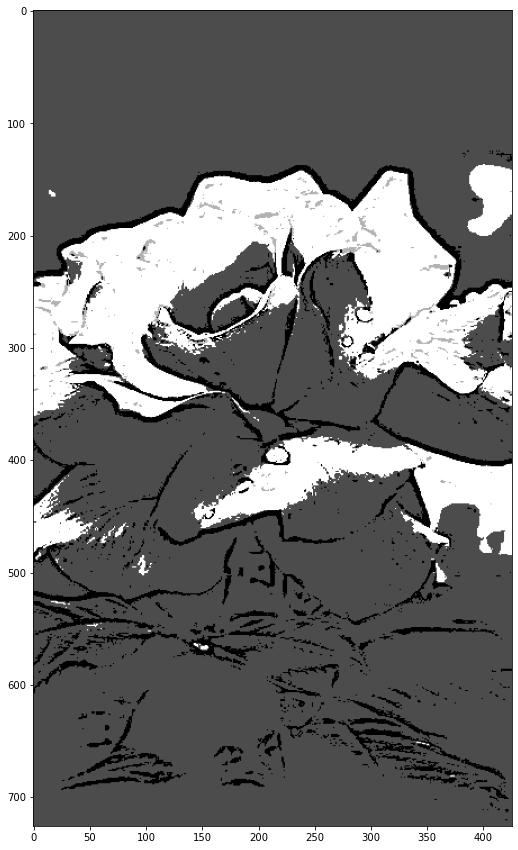

In [12]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)

# Robert Edge Detection

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('flower.jpg', cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Grayscale processing image
grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Then use Numpy to build a convolution kernel, and perform a convolution operation on the gray image in the x and y directions:

In [14]:
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)

x = cv.filter2D(grayImage, cv.CV_16S, kernelx)
y = cv.filter2D(grayImage, cv.CV_16S, kernely)

Note: After the Roberts operator is processed, the convertScaleAbs() function needs to be called to calculate the absolute value, and the image is converted to an 8-bit image for display, and then image fusion can be performed:

In [15]:
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
Roberts = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

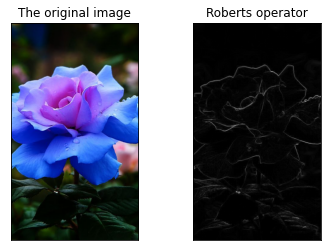

In [16]:
titles = ['The original image', 'Roberts operator']
images = [rgb_img, Roberts]

for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# Region Growing

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys

def on_mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        boxes.append(s_box)


In [18]:
def region_growing(img, seed):
    #Parameters for region growing
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    region_threshold = 0.2
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []

    #Mean of the segmented region
    region_mean = img[seed]

    #Input image parameters
    height, width = img.shape
    image_size = height * width

    #Initialize segmented output image
    segmented_img = np.zeros((height, width, 1), np.uint8)

    #Region growing until intensity difference becomes greater than certain threshold
    while (intensity_difference < region_threshold) & (region_size < image_size):
        #Loop through neighbor pixels
        for i in range(4):
            #Compute the neighbor pixel position
            x_new = seed[0] + neighbors[i][0]
            y_new = seed[1] + neighbors[i][1]

            #Boundary Condition - check if the coordinates are inside the image
            check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            #Add neighbor if inside and not already in segmented_img
            if check_inside:
                if segmented_img[x_new, y_new] == 0:
                    neighbor_points_list.append([x_new, y_new])
                    neighbor_intensity_list.append(img[x_new, y_new])
                    segmented_img[x_new, y_new] = 255

        #Add pixel with intensity nearest to the mean to the region
        distance = abs(neighbor_intensity_list-region_mean)
        pixel_distance = min(distance)
        index = np.where(distance == pixel_distance)[0][0]
        segmented_img[seed[0], seed[1]] = 255
        region_size += 1

        #New region mean
        region_mean = (region_mean*region_size + neighbor_intensity_list[index])/(region_size+1)

        #Update the seed value
        seed = neighbor_points_list[index]
        #Remove the value from the neighborhood lists
        neighbor_intensity_list[index] = neighbor_intensity_list[-1]
        neighbor_points_list[index] = neighbor_points_list[-1]

    return segmented_img

In [25]:
boxes = []
filename = 'flower.jpg'
img = cv2.imread(filename, 0)
resized = cv2.resize(img,(256,256))
cv2.namedWindow('input')
cv2.setMouseCallback('input', on_mouse, 0,)
cv2.imshow('input', resized)
cv2.waitKey()
print("Starting region growing based on last click")
#seed = boxes[-1]
cv2.imshow('resized', resized)
print("Done. Showing output now")

cv2.waitKey()
cv2.destroyAllWindows()

Starting region growing based on last click
Done. Showing output now


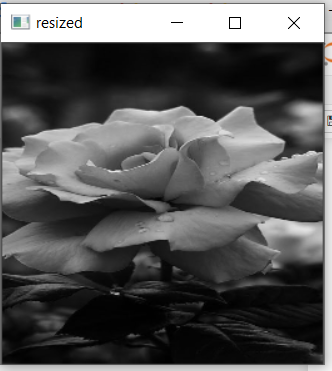
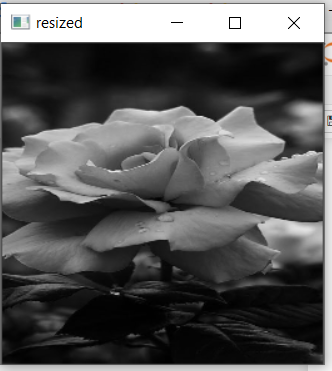